In [10]:
import numpy as np
import cv2 as cv2
import matplotlib.pyplot as plt
from skimage import data, color, exposure
from skimage.feature import hog
import matplotlib.pyplot as plt
%matplotlib inline

## Theory
* The target of this lab is using techniques to find out where the keypoint located. The set of this techniques can be splitted into 4 stages: 
    1. __Feature detection (extraction)__: each image is searched for locations that are __likely__ to match well in other images
    2. __Feature description__: each region around detected keypoint locations is converted into a more compact and stable (invariant) descriptor that can be matched against other descriptors.
    3. __Feature matching__: efficiently searches for likely matching candidates in other images
    4. __Feature tracking__: only searches a small neighborhood around each detected feature and is therefore more suitable for video processing.
* Note: 1 -> 2 -> 3 or 4 depends on the problem we are facing, feature tracking is more suitable if we want to detect specific object in video or in sequential images, feature matching is commonly used when the goal is to recognize objects or patterns in images.


## Feature detectors
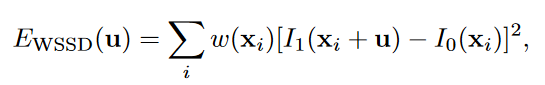
__Fact__: The scale-invariant feature transform (SIFT) is a computer vision algorithm to detect, describe, and match local features in images, invented by David Lowe in 1999

## Function 1

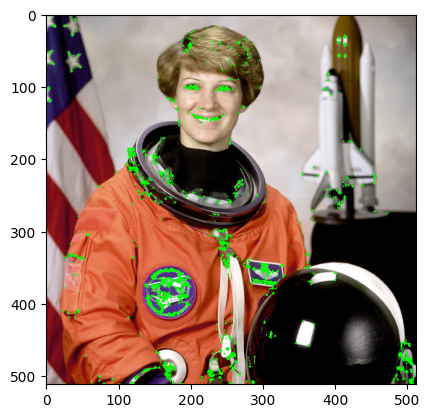

In [2]:
def harris_corner_detector(image, k=0.06, threshold=0.001):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Calculate image gradients using Sobel operators
    Ix = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    Iy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    
    # Calculate Harris corner response
    Ix2 = Ix * Ix
    Iy2 = Iy * Iy
    IxIy = Ix * Iy

    # Apply Gaussian blurring to the gradient products because Forstner–Harris
    # proposed using a Gaussian weighting window
    Ix2 = cv2.GaussianBlur(Ix2, (3, 3), 0)
    Iy2 = cv2.GaussianBlur(Iy2, (3, 3), 0)
    IxIy = cv2.GaussianBlur(IxIy, (3, 3), 0)
    
    # Calculate the corner response function R
    det = Ix2 * Iy2 - IxIy * IxIy
    trace = Ix2 + Iy2
    R = det - k * trace * trace
    image[R > threshold * R.max()]=[0, 255, 0]
    return image

# Load the image
image = data.astronaut()

# Perform corner detection
edge_detected_image = harris_corner_detector(image)

# Display the output image
plt.imshow(edge_detected_image)

## Function 2

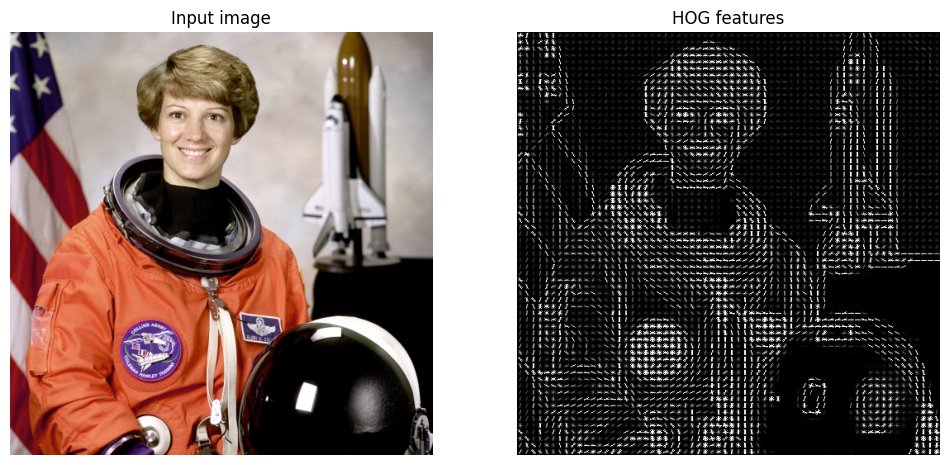

In [6]:
def plot_hog(image):
    # Convert the image to grayscale
    image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Calculate the HOG features
    hog_features, hog_image = hog(image_gray, orientations=9, pixels_per_cell=(8, 8),
                                 cells_per_block=(2, 2), visualize=True)

    # Create the figure and subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

    # Plot the input image
    ax1.axis('off')
    ax1.imshow(image, cmap=plt.cm.gray)
    ax1.set_title('Input image')

    # Rescale histogram for better visualization
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    # Plot the HOG features
    ax2.axis('off')
    ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
    ax2.set_title('HOG features')

    plt.show()


# Load an example image
image = data.astronaut()

# Plot the HOG image
plot_hog(image)


## Function 3

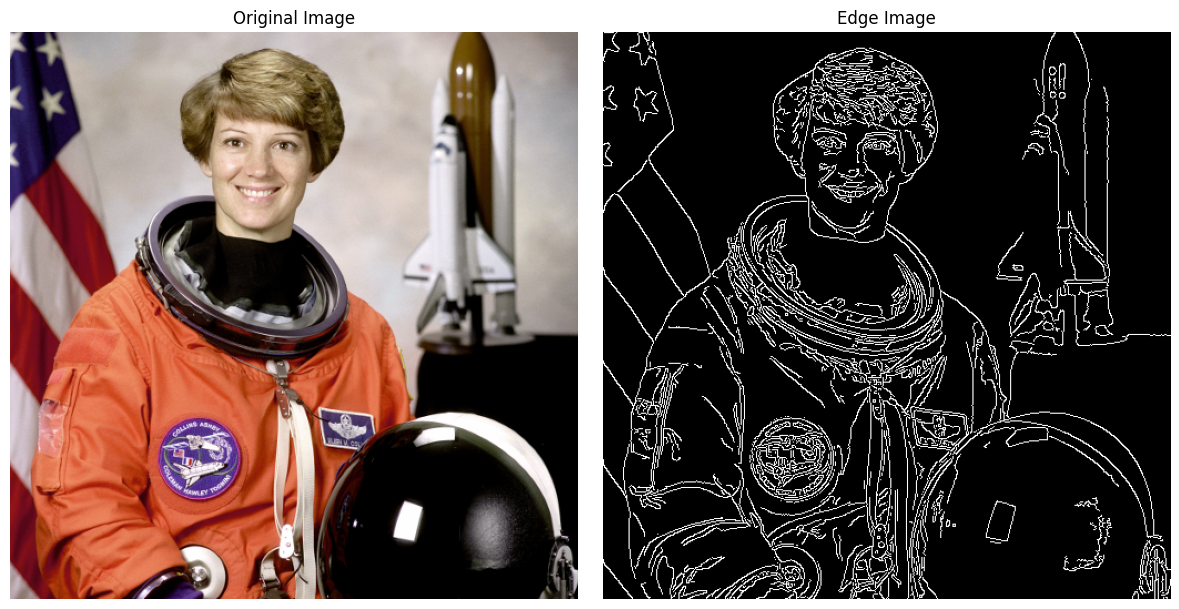

In [8]:
def plot_edge_detection_with_Canny(image):
    # Perform Canny edge detection
    edges = cv2.Canny(image, 100, 200)

    # Create the figure
    fig = plt.figure(figsize=(12, 6))

    # Plot the original image
    ax1 = fig.add_subplot(121)
    ax1.imshow(image, cmap='gray')
    ax1.set_title('Original Image')
    ax1.axis('off')

    # Plot the edge image
    ax2 = fig.add_subplot(122)
    ax2.imshow(edges, cmap='gray')
    ax2.set_title('Edge Image')
    ax2.axis('off')

    plt.tight_layout()
    plt.show()

# Call the function to plot edge detection
plot_edge_detection_with_Canny(image)


## Function 4

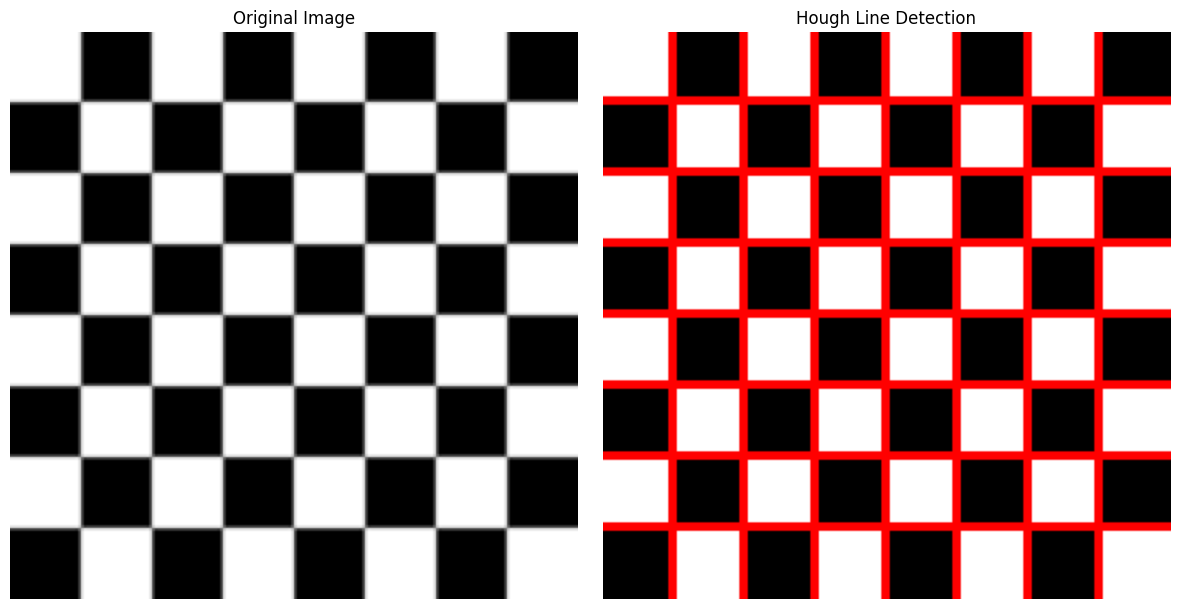

In [9]:
def hough_line_detection(image, threshold=100, min_line_length=50, max_line_gap=10):
    if len(image.shape) == 2:
        # Convert grayscale image to BGR color image
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detection
    edges = cv2.Canny(gray, 50, 150)

    # Perform Hough Line Transform
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold, minLineLength=min_line_length, maxLineGap=max_line_gap)

    # Draw the detected lines on the image
    line_image = np.copy(image)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 255), 2)

    return line_image

image = data.checkerboard()
# Perform Hough line detection
result = hough_line_detection(image)

# Convert the image from BGR to RGB for matplotlib display
result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Display the original image
ax1.imshow(image, cmap="Greys_r")
ax1.set_title('Original Image')
ax1.axis('off')

# Display the Hough line detection result
ax2.imshow(result_rgb, cmap="Greys_r")
ax2.set_title('Hough Line Detection')
ax2.axis('off')

plt.tight_layout()
plt.show()
